In [60]:
import pandas as pd

data = pd.read_csv("./data.csv")

## Hotel Review Data Info

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.3+ KB


In [62]:
data.describe()

,Review,date,Location
count,6393,6448,1711
unique,6384,403,1082
top,Amazing\n \n Read more\n Read less,Jun 2019,United States of America
freq,4,145,116


In [63]:
data.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

## Data Pre-Processing 

remove unnecessary words from review columns

In [64]:
def remove_phrases(text):
    # Remove "Read more" and "Read less" phrases
    return str(text).replace('Read more', '').replace('Read less', '').replace("\n", '')

data['Review'] = data['Review'].apply(remove_phrases)


remove null value records from data

In [65]:
df = data.dropna()

In [66]:
# formate date
df['date'] = pd.to_datetime(df['date'])

C:\Users\JILL\AppData\Local\Temp\ipykernel_11028\4096787722.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
df.describe()

,date
count,1711
mean,2019-02-14 10:09:19.672706048
min,2018-08-02 00:00:00
25%,2018-10-26 00:00:00
50%,2019-02-16 00:00:00
75%,2019-06-11 12:00:00
max,2019-08-20 00:00:00


In [68]:
df.head()

,Review,date,Location
0,I was very impressed with the resort. Great st...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
10,Very clean and friendly and I love the locatio...,2019-08-19,California


##  Sentiment Analysis
Predicting whether a review is positive or negative using the Natural Language Toolkit (NLTK) library.

In [69]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JILL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JILL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JILL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [70]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

df['Review'] = df['Review'].apply(preprocess_text)


C:\Users\JILL\AppData\Local\Temp\ipykernel_11028\3247786412.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
sia = SentimentIntensityAnalyzer()
positive_threshold = 0.2

df['CompoundScore'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

df['Sentiment'] = df['CompoundScore'].apply(lambda x: 1 if x >= positive_threshold else 0)

# Group by 'Location' and calculate the total and positive review count
location_review_counts = df.groupby('Location')['Sentiment'].agg(['count', 'sum']).reset_index()

# percentage of positive reviews
location_review_counts['PositivePercentage'] = (location_review_counts['sum'] / location_review_counts['count']) * 100
# print(location_review_counts)

C:\Users\JILL\AppData\Local\Temp\ipykernel_11028\1756568734.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JILL\AppData\Local\Temp\ipykernel_11028\1756568734.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
# normalize CompoundScore in range [0, 1]
df['NormalizedScore'] = (df['CompoundScore'] - df['CompoundScore'].min()) / (df['CompoundScore'].max() - df['CompoundScore'].min())


C:\Users\JILL\AppData\Local\Temp\ipykernel_11028\1588671638.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
df.head()

,Review,date,Location,CompoundScore,Sentiment,NormalizedScore
0,impress resort great staff main resort pool ba...,2019-08-20,Sebastian,0.9300,1,0.969594
1,room nice outsid need work also free breakfast...,2019-08-20,Los Angeles,0.8779,1,0.943147
2,great locat stay hotel last three trip new york,2019-08-20,Georgia,0.6249,1,0.814721
4,great locat room larg spaciou park easi apprec...,2019-08-19,Palm Harbor,0.6249,1,0.814721
10,clean friendli love locat restaur insid excel ...,2019-08-19,California,0.8720,1,0.940152


## Exploratory Data Analysis (EDA):

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [75]:
# Sentiment distribution with plotly
fig = px.histogram(df, x='Sentiment', title='Fig-1: Sentiment distribution', color='Sentiment')
fig.update_layout(xaxis_title='Sentiment', yaxis_title='Count')
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.show()

In [76]:
N = 25
top_locations = df['Location'].value_counts().nlargest(N).index

# Filter the DataFrame to include only the top N locations
df_top_locations = df[df['Location'].isin(top_locations)]

# Check sentiment distribution by location
fig = px.histogram(df_top_locations, x='Location', color='Sentiment', barmode='group', title=f'Fig-2: Sentiment Distribution for Top {N} Locations')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [77]:
location_review_counts.sort_values(by='PositivePercentage', ascending=False)

# distribution of positive persentage reviews per location
fig = px.histogram(location_review_counts, x='PositivePercentage', title='Fig-3: Distribution of positive percentage reviews per location')
fig.update_layout(xaxis_title='Positive Percentage', yaxis_title='Count')
fig.update_traces(texttemplate='%{value}', textposition='outside')
# set color palette for plot as percentage values
fig.update_traces(marker_color=px.colors.sequential.amp)
fig.show()

In [78]:
# Check sentiment distribution by location
fig = px.histogram(df, x='Location', color='Sentiment', barmode='group')
fig.update_layout(title=f'Fig-4: Sentiment Distribution for Locations', xaxis_title='Location', yaxis_title='Count')
fig.show()

In [83]:

# Calculate the average sentiment score for each date
average_sentiment_by_date = df.groupby('date')['NormalizedScore'].mean().reset_index()

# Plot the sentiment trends over time with plotly.
fig = px.line(average_sentiment_by_date, x='date', y='NormalizedScore')
fig.update_layout(title='Fig-5: Sentiment Trends Over Time', xaxis_title='Date', yaxis_title='Sentiment Score')
fig.show()

In [80]:
# for 5 location show seniment trends over time
N = 5
top_locations = df['Location'].value_counts().nlargest(N).index

# Filter the DataFrame to include only the top N locations
df_top_locations = df[df['Location'].isin(top_locations)]

# Calculate the average sentiment score for each date
average_sentiment_by_date = df_top_locations.groupby(['Location', 'date'])['CompoundScore'].mean().reset_index()

# Plot the sentiment trends over time with plotly.
fig = px.line(average_sentiment_by_date, x='date', y='CompoundScore', color='Location')
fig.update_layout(title=f'Fig-6: Sentiment Trends Over Time for Top {N} Locations', xaxis_title='Date', yaxis_title='Sentiment Score')
fig.show()


==> Common Words in Positive and Negative Revies.

In [81]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

negative_reviews = df[df['Sentiment'] == 0]['Review']
positive_reviews = df[df['Sentiment'] == 1]['Review']

# Combine all reviews into a single text by sentiment
negative_text = ' '.join(negative_reviews)
positive_text = ' '.join(positive_reviews)

# Tokenize the text into words
negative_tokens = word_tokenize(negative_text)
positive_token = word_tokenize(positive_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))

filtered_negative_tokens = [word.lower() for word in negative_tokens if word.isalpha() and word.lower() not in stop_words]

filtered_positive_tokens = [word.lower() for word in positive_token if word.isalpha() and word.lower() not in stop_words]

# Calculate the frequency distribution of words
negative_freq_dist = FreqDist(filtered_negative_tokens)
positive_freq_dist = FreqDist(filtered_positive_tokens)

# Get the most common words in reviews
negative_common_words = negative_freq_dist.most_common(10) 
positive_common_words = positive_freq_dist.most_common(10) 

print("Common words in Positive reviews:")
for word, frequency in positive_common_words:
    print(f"{word}: {frequency}")

print("Common words in Negative reviews:")
for word, frequency in negative_common_words:
    print(f"{word}: {frequency}")


Common words in Positive reviews:
room: 897
hotel: 602
staff: 478
great: 420
stay: 407
clean: 405
locat: 395
nice: 358
good: 220
friendli: 215
Common words in Negative reviews:
room: 359
hotel: 188
check: 89
stay: 88
staff: 86
park: 79
de: 70
time: 68
bed: 61
desk: 59


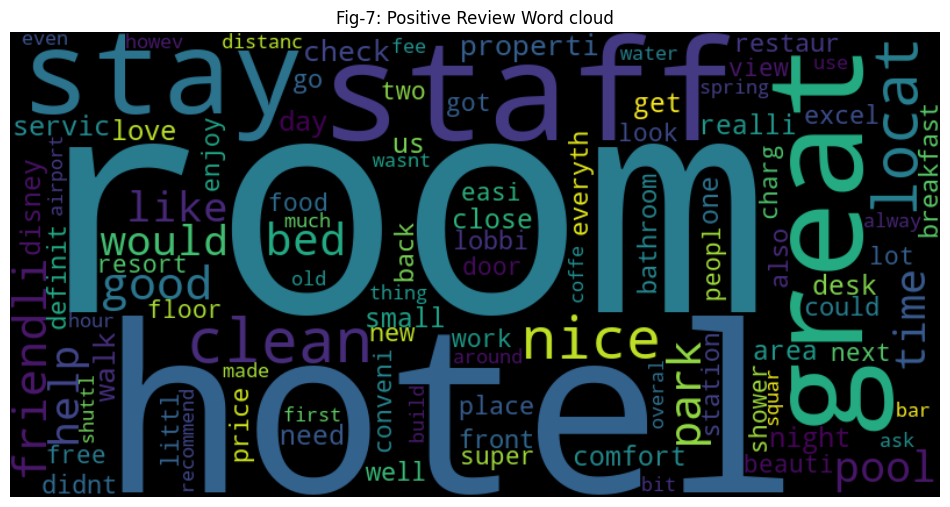

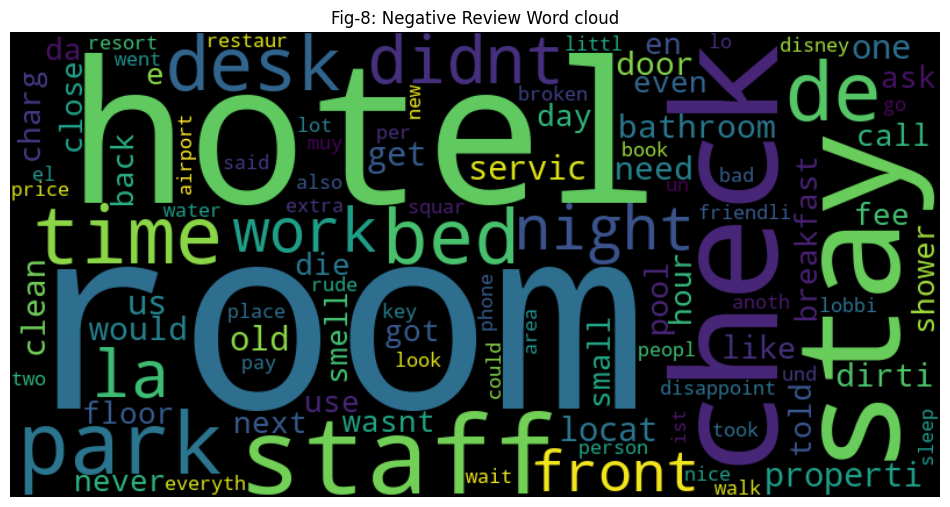

In [82]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(positive_freq_dist)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Fig-7: Positive Review Word cloud")
plt.axis("off")
plt.show()

# Generate word cloud for negative reviews
wordcloud = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(negative_freq_dist)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Fig-8: Negative Review Word cloud")
plt.axis("off")
plt.show()


# Summary of the Analysis
- The analysis focuses on hotel reviews, aiming to gain insights into sentiment patterns, distribution across locations, and common themes in positive and negative reviews. Here's a breakdown of the analysis:

## Data Description:

The dataset contains information on hotel reviews, including the review text, date, and location.
There are 6,448 entries with three columns: Review, date, and Location.
Missing values exist in the 'Review' and 'Location' columns.

1. Data Pre-Processing:
- Unnecessary phrases such as "Read more" and "Read less" were removed from the 'Review' column.
- Null values were removed from the dataset.
- The 'date' column was formatted into a datetime format.

2. Sentiment Analysis:
- Natural Language Toolkit (NLTK) library was employed for sentiment analysis.
- Text data underwent pre-processing steps, including lowercasing, removal of punctuation and numbers, tokenization, stop word removal, and stemming.
- SentimentIntensityAnalyzer from NLTK was used to calculate sentiment compound scores.
- Reviews were classified as positive or negative based on a defined threshold (0.2).
- Sentiment distribution across locations was analyzed, and the positive percentage was calculated for each location.

3. Exploratory Data Analysis (EDA):

- Various visualizations were generated using Matplotlib, Plotly and Seaborn to explore sentiment distribution, positive percentage by location, and sentiment trends over time.

- Top locations with the highest review counts were identified and analyzed for sentiment distribution.

4. Common Words in Positive and Negative Reviews:
- The most common words in positive and negative reviews were identified.
- Positive reviews frequently mentioned words such as `room, hotel, staff, great, stay, clean, locat, nice, good, friendli`
- Negative reviews commonly included words like `room, hotel, check, stay, staff, park, time, bed, desk`

5. Word Clouds:
- Word clouds were generated for both positive and negative reviews, providing a visual representation of the most frequent words in each sentiment category.


## Interesting Insights:

### 1. Positive Sentiment Trends Over Time:

Overall, the sentiment trends over time indicate a positive sentiment among reviewers. 
Based on the figure-6:
-  The figure  shows that the sentiment trends fluctuated over time for each location, but generally showed a positive trend.
- USA and New York had the gradual increase in sentiment score over time.
- Canada and California had the lowest sentiment score during Sep 2018 to Jan 2019. After that trends are increased.
- San Jose had the highest sentiment score during Sep 2018 to Mar 2019, After that trends are decreased. that shows a negative impact on the San Jose Location.

### 2. Top Locations with Positive Reviews:

Some locations stand out with a higher percentage of positive reviews, suggesting areas where hotels are more likely to receive positive feedback.
- Location with the highest positive reviews
    - USA, New York, San Jose, California and Canada has the highest positive reviews. This suggests that the hotels are more liked by the customers.
    - Chicago and Washington has the zero nagative reviews.
    - for more location review Figure - 2

- Location with the low positive reviews
    - Puerto Rico, Atlanta GA, Florida and Oregon have the lowest positive reviews.
    - for more location review Figure - 4

- Distribution of Reviews count the number of reviews with percentage of positivity. 
    - 717 (95-100%) reviews.
    - 278 (0-5%) reviews. 
    - 10 (20-35%) reviews.
    - 37 (45-45%) reviews.
    - 45 (60-80%) reviews.
    - for more reiew Figure - 3

### 3. Common Themes in Positive Reviews:

Positive reviews commonly mention aspects like clean rooms, friendly staff. This highlights key factors contributing to positive guest experiences.

- Word Cloud of Positive Reviews (Figure-7): The figure is a colorful word cloud that shows the most frequent words in positive reviews for hotels. The size of the words indicates their relative frequency, with larger words being more common. 

- Key Words in Positive Reviews: The key words in positive reviews are `“room,” “hotel,” “staff,” “clean,” “nice,” “location,” and “stay.”` These words suggest that positive reviews often focus on the quality of the room, the hotel facilities and services, the staff’s friendliness and professionalism, the cleanliness of the hotel, the pleasant atmosphere, the convenient location, and the overall experience during the stay.

### 4. Common Themes in Negative Reviews:

Negative reviews often mention issues with rooms, check-in processes, and staff. Addressing these specific pain points could lead to improved customer satisfaction.

- Word Cloud of Negative Reviews (Figure-8): The figure is a colorful word cloud that shows the most frequent words in negative reviews for hotels. The size of the words indicates their relative frequency, with larger words being more common.

- Key Words in Negative Reviews: the key words in negative reviews are `“room,” “hotel,” “check,” “stay,” and “staff.”` These words suggest that negative reviews often mention issues with the room quality, the hotel facilities and services, the check-in and check-out processes, the overall experience during the stay, and the staff’s attitude and professionalism. Words like `“park,” “desk,” “bed,” and “time”` could also indicate specific problems guests might have faced, such as parking fees, front desk delays, uncomfortable beds, or long waiting times.

### 5. Temporal Patterns in Sentiment:

Analyzing sentiment trends over time reveals potential seasonal patterns or events affecting customer sentiments. Identifying such patterns can help hotels tailor their services to specific times of the year.

- Sentiment Trends Over Time (Figure-5): The figure shows how the sentiment scores of hotel reviews changed over time from September 2018 to July 2019. The sentiment score ranges from 0 to 1, where higher values indicate more positive sentiments.

- Fluctuations and Patterns: The figure reveals that the sentiment trends fluctuated over time, with no clear pattern of consistent increase or decrease. 
    - November 2018 had the lowest sentiment score of 0.087, indicating a high level of dissatisfaction among customers.
    - August 2019 had the highest sentiment score of 0.9952, indicating a high level of satisfaction among customers
    - Feburary 2019 to May 2019 had the significant drops of sentiment scores.
    - September 2018 to January 2019 had significant increases in the sentiment scores.

